## The Workflow/Steps Followed in this Notebook for a simple Image Classification using Keras

> Step 1 : Getting the data ready

> Step 2 : Turning the data into tensors

> Step 3 : Building the model 

> Step 4 : Making predictions on the test data



## **Step 1:Getting the data ready**

In [1]:
#Import all the necessary packages needed for your problem
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import os 

As the training,validation,test data each has two different folders named Male and Female we need to combine them and make them as a single data frame for training,validation,test data frame 

In [2]:
#As there are two folder storing their file path in two different variables
Train_female_path="../input/gender-recognition-200k-images-celeba/Dataset/Train/Female"
Train_male_path="../input/gender-recognition-200k-images-celeba/Dataset/Train/Male"
Validation_female_path="../input/gender-recognition-200k-images-celeba/Dataset/Validation/Female"
Validation_male_path="../input/gender-recognition-200k-images-celeba/Dataset/Validation/Male"
Test_female_path="../input/gender-recognition-200k-images-celeba/Dataset/Test/Female"
Test_male_path="../input/gender-recognition-200k-images-celeba/Dataset/Test/Male"

In [3]:
#Creating a list to store all the training male and female filepaths

female_train_files=[]
female_train=list()
male_train=list()
# listdir lists all the files in the given file path and stores it in the list
female_train_files=os.listdir(Train_female_path)
male_train_files=os.listdir(Train_male_path)
# As for now we only get the file name as in (01.jpg) so appending the file path with the filename
for i in range(len(os.listdir(Train_female_path))):
    female_train.append(Train_female_path+"/"+str(female_train_files[i]))
for i in range(len(os.listdir(Train_male_path))):
    male_train.append(Train_male_path+"/"+str(male_train_files[i]))
  

In [4]:
# Checking for the entire size of the training data
len(female_train)+len(male_train)

160000

In [5]:
Train_df=pd.DataFrame()

In [6]:
# Creating a training data frame with female images path and their target value as Female
Train_df=pd.DataFrame({"ID":female_train,"Target":"Female"})

In [7]:
len(Train_df)

92845

In [8]:
Train_df["ID"][0],Train_df["Target"][0]

('../input/gender-recognition-200k-images-celeba/Dataset/Train/Female/038768.jpg',
 'Female')

In [9]:
# Creating Dataframe from male file path and assigning their as Male
Male_df=pd.DataFrame({"ID":male_train,"Target":"Male"})

In [10]:
# Combining the male and female training dataframe
Train_df=Train_df.append(Male_df,ignore_index=False)

In [11]:
len(Train_df)

160000

In [12]:
# Shuffling the entire data frame as their in the female first and male last order
Train_df=Train_df.sample(frac=1)

In [13]:
Train_df.head()

,ID,Target
59708,../input/gender-recognition-200k-images-celeba...,Female
13421,../input/gender-recognition-200k-images-celeba...,Male
21596,../input/gender-recognition-200k-images-celeba...,Female
42903,../input/gender-recognition-200k-images-celeba...,Male
14881,../input/gender-recognition-200k-images-celeba...,Male


In [14]:
#Fetching all the file names from Training dataframe and storing it as list
All_training_files=[fname for fname in Train_df["ID"]]

In [15]:
All_training_files[:7]

['../input/gender-recognition-200k-images-celeba/Dataset/Train/Female/151386.jpg',
 '../input/gender-recognition-200k-images-celeba/Dataset/Train/Male/103671.jpg',
 '../input/gender-recognition-200k-images-celeba/Dataset/Train/Female/067074.jpg',
 '../input/gender-recognition-200k-images-celeba/Dataset/Train/Male/082942.jpg',
 '../input/gender-recognition-200k-images-celeba/Dataset/Train/Male/101101.jpg',
 '../input/gender-recognition-200k-images-celeba/Dataset/Train/Female/067409.jpg',
 '../input/gender-recognition-200k-images-celeba/Dataset/Train/Female/103617.jpg']

In [16]:
# Converting the target variable to num py
labels=Train_df["Target"].to_numpy()

In [17]:
labels[:10]

array(['Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female'], dtype=object)

In [18]:
# Finding the unique values in the labels as there is only two target that needs to be predicted
true_labels=np.unique(labels)

In [19]:
len(true_labels)

2

In [20]:
labels[1]==true_labels

array([False,  True])

In [21]:
boolean_labels=[labels == true_labels for labels in labels]
len(boolean_labels)

160000

In [22]:
print(labels[0])
print(np.where(true_labels[0]==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))


Female
(array([0]),)
0
[1 0]


In [23]:
boolean_labels[0]

array([ True, False])

In [24]:
Train_df.tail()

,ID,Target
78512,../input/gender-recognition-200k-images-celeba...,Female
49533,../input/gender-recognition-200k-images-celeba...,Female
53431,../input/gender-recognition-200k-images-celeba...,Male
35598,../input/gender-recognition-200k-images-celeba...,Female
65241,../input/gender-recognition-200k-images-celeba...,Male


In [25]:
# Creating the Feature variable and Target variable
X=All_training_files
y=boolean_labels

In [26]:
# Experimenting with 10k samples 
NUM_IMAGES=10000

In [27]:
female_val_files=[]
female_val=list()
male_val=list()
#Storing  all the files in given file path into two variables
female_val_files=os.listdir(Validation_female_path)
male_val_files=os.listdir(Validation_male_path)
# Appending the filepath with the file name
for i in range(len(os.listdir(Validation_female_path))):
    female_val.append(Validation_female_path+"/"+str(female_val_files[i]))
for i in range(len(os.listdir(Validation_male_path))):
    male_val.append(Validation_male_path+"/"+str(male_val_files[i]))
  

In [28]:
female_val[1]

'../input/gender-recognition-200k-images-celeba/Dataset/Validation/Female/182606.jpg'

In [29]:
# Creating a dataframe for male and female
Valid_df=pd.DataFrame({"ID":female_val,"Target":"Female"})
new_val_row=pd.DataFrame({"ID":male_val,"Target":"Male"})
# Combining the both 
Valid_df=Valid_df.append(new_val_row,ignore_index=True)


In [30]:
Valid_df.head()

,ID,Target
0,../input/gender-recognition-200k-images-celeba...,Female
1,../input/gender-recognition-200k-images-celeba...,Female
2,../input/gender-recognition-200k-images-celeba...,Female
3,../input/gender-recognition-200k-images-celeba...,Female
4,../input/gender-recognition-200k-images-celeba...,Female


In [31]:
#Shuffling the data
Valid_df=Valid_df.sample(frac=1)

In [32]:
Valid_df.tail()

,ID,Target
17148,../input/gender-recognition-200k-images-celeba...,Male
2340,../input/gender-recognition-200k-images-celeba...,Female
8447,../input/gender-recognition-200k-images-celeba...,Female
4186,../input/gender-recognition-200k-images-celeba...,Female
6273,../input/gender-recognition-200k-images-celeba...,Female


In [33]:
# Getting  all the file paths from validation dataframe
All_val_files=[fname for fname in Valid_df["ID"]]

In [34]:
All_val_files[:5]

['../input/gender-recognition-200k-images-celeba/Dataset/Validation/Female/201399.jpg',
 '../input/gender-recognition-200k-images-celeba/Dataset/Validation/Female/187515.jpg',
 '../input/gender-recognition-200k-images-celeba/Dataset/Validation/Female/199046.jpg',
 '../input/gender-recognition-200k-images-celeba/Dataset/Validation/Female/195842.jpg',
 '../input/gender-recognition-200k-images-celeba/Dataset/Validation/Female/200468.jpg']

In [35]:
val_labels=Valid_df["Target"].to_numpy()
val_labels[:10]

array(['Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Female'], dtype=object)

In [36]:
val_true_labels=np.unique(val_labels)
len(val_true_labels)

2

In [37]:
boolean_val_labels=[labels==val_true_labels for labels in val_labels ]
boolean_val_labels[:10]

[array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False])]

In [38]:
# Splitting data into training and validation set
X_train,y_train=All_training_files[:NUM_IMAGES],boolean_labels[:NUM_IMAGES]
X_val,y_val=All_val_files[:2000],boolean_val_labels[:2000]

In [39]:
len(X_train)

10000

## Step 2: Turning the data into tensors

In [40]:
IMG_SIZE=224
# Creating a function that can preprocess the data
def preprocess_data(image_path,img_size=IMG_SIZE):
    #Reading the image path
    image=tf.io.read_file(image_path)
    #Turning the image into numerical tensors of colour channel
    image=tf.image.decode_jpeg(image,channels=3)
    #Converting the colour channels from 0-255 values to 0-1
    image=tf.image.convert_image_dtype(image,tf.float32)
    #Resize our images into the desired value 224
    image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    return image

In [41]:
#Function to return a tuple of preprocessed image in form tensors and their respective labels
def get_image_label(image_path,label):
    image=preprocess_data(image_path)
    return image,label

In [42]:
# Function to change all our X and y into data batches
BATCH_SIZE=32
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    # if it is training data then there won't be lables
    if test_data==True:
        print("Create test data batches....")
        data=tf.data.Dataset.from_tensor_slices((tf.context(X)))
        data_batch=data.map(preprocess_data).batch(BATCH_SIZE)
        return data_batch
    # if it is valid data
    elif valid_data==True:
        print("Create validation data batches.....")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        data_batch=data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    # if it is training data
    else:
        print("Creating training data batches....")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        data=data.map(get_image_label)
        data_batch=data.batch(BATCH_SIZE)
        return data_batch
        

In [43]:
len(X_train),len(X_val)

(10000, 2000)

In [44]:
# Create training and validation data batches
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)


Creating training data batches....
Create validation data batches.....


In [45]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)))

## Visualizing the data batches

In [46]:
import matplotlib.pyplot as plt
def show_25_images(images,label):
    # setup a figure 
    plt.figure(figsize=(10,10))
    # loop through 25 images
    for i in range(25):
        # Create subplots (5 rows,5 columns)
        ax=plt.subplot(5,5,i+1)
        # Display an image
        plt.imshow(images[i])
        # Add image label as title
        plt.title(true_labels[label[i].argmax()])
        # Turn the grid lines off
        plt.axis("off")

In [47]:
len(val_data)

63

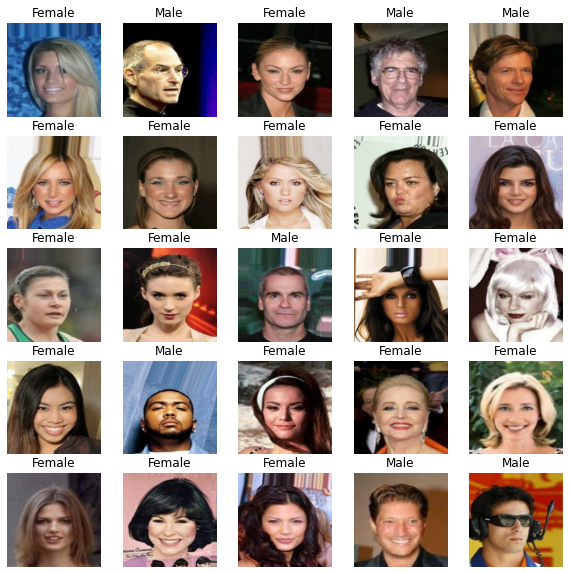

In [48]:
# Unbatch the data using as_numpy_iterator
train_images,train_labels=next(train_data.as_numpy_iterator())
# Now lets visualize the images in the training batch
show_25_images(train_images,train_labels)

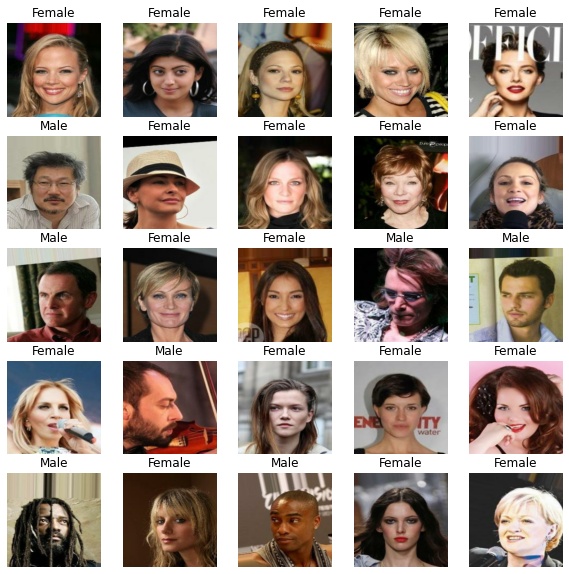

In [49]:
# Now lets visualize the images in the validation batch
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Step 3: Building a machine learning model

In [50]:


# Setting up a input shape
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]

# Settion up a output shape
OUTPUT_SHAPE=len(true_labels)

# Model URL
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [51]:
# Building a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    model=tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                             activation="softmax")
    ])
    
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]

  )

    # Build the model
    model.build(INPUT_SHAPE)

    return model

In [52]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 2)                 2004      
Total params: 5,434,717
Trainable params: 2,004
Non-trainable params: 5,432,713
_________________________________________________________________


In [53]:
%load_ext tensorboard

In [54]:
# Create a early stopping callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [55]:
NUM_EPOCHS=100

In [56]:
import datetime
# Create a function to build a TensorBoard Callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir=os.path.join("./kaggle/working/",
                      # Make it so the logs gets tracked whenever we run the expirement
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir) 

In [57]:
# Build a function to train a model and return a trained model
def train_model():
    # Create a model
    model=create_model()

    # Create a new session everytime we train a model
    tensorboard=create_tensorboard_callback()

    # Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
    return model
  

In [58]:
model=train_model()

Epoch 1/100
313/313 [==============================] - 33s 106ms/step - loss: 0.2477 - accuracy: 0.9016 - val_loss: 0.2160 - val_accuracy: 0.9175
Epoch 2/100
313/313 [==============================] - 18s 58ms/step - loss: 0.1852 - accuracy: 0.9258 - val_loss: 0.2018 - val_accuracy: 0.9235
Epoch 3/100
313/313 [==============================] - 19s 59ms/step - loss: 0.1746 - accuracy: 0.9324 - val_loss: 0.1972 - val_accuracy: 0.9235
Epoch 4/100
313/313 [==============================] - 18s 59ms/step - loss: 0.1687 - accuracy: 0.9359 - val_loss: 0.1951 - val_accuracy: 0.9260
Epoch 5/100
313/313 [==============================] - 18s 58ms/step - loss: 0.1647 - accuracy: 0.9374 - val_loss: 0.1941 - val_accuracy: 0.9275
Epoch 6/100
313/313 [==============================] - 19s 60ms/step - loss: 0.1617 - accuracy: 0.9382 - val_loss: 0.1936 - val_accuracy: 0.9300
Epoch 7/100
313/313 [==============================] - 18s 58ms/step - loss: 0.1592 - accuracy: 0.9384 - val_loss: 0.1934 - val_a

In [59]:
len(val_data)

63

In [60]:
# Make Predictions on the validation data
predictions=model.predict(val_data,verbose=1)


63/63 [==============================] - 3s 46ms/step


In [61]:
predictions[:10]

array([[9.9589902e-01, 4.1009048e-03],
       [9.9213868e-01, 7.8613460e-03],
       [9.9953282e-01, 4.6721223e-04],
       [9.3276256e-01, 6.7237429e-02],
       [9.9992669e-01, 7.3354458e-05],
       [8.6971652e-03, 9.9130285e-01],
       [3.1190354e-01, 6.8809646e-01],
       [9.9654347e-01, 3.4565215e-03],
       [4.8871011e-01, 5.1128989e-01],
       [9.9766254e-01, 2.3374232e-03]], dtype=float32)

In [62]:
predictions.shape

(2000, 2)

In [63]:
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {true_labels[np.argmax(predictions[0])]}")

[0.995899  0.0041009]
Max value (probability of prediction): 0.9958990216255188
Max index: 0
Predicted label: Female


In [64]:

# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return true_labels[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'Female'

In [65]:
len(val_data)

63

In [66]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
    
    images = []
    labelss = []
    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labelss.append(true_labels[np.argmax(label)])
    return images, labelss

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.        , 0.03921569, 0.        ],
         [0.        , 0.03921569, 0.        ],
         [0.        , 0.03921569, 0.        ],
         ...,
         [0.01579135, 0.01971292, 0.        ],
         [0.01960784, 0.02352941, 0.        ],
         [0.01960784, 0.02352941, 0.        ]],
 
        [[0.        , 0.03921569, 0.        ],
         [0.        , 0.03921569, 0.        ],
         [0.        , 0.03921569, 0.        ],
         ...,
         [0.01579135, 0.01971292, 0.        ],
         [0.01960784, 0.02352941, 0.        ],
         [0.01960784, 0.02352941, 0.        ]],
 
        [[0.        , 0.03921569, 0.        ],
         [0.        , 0.03921569, 0.        ],
         [0.        , 0.03921569, 0.        ],
         ...,
         [0.01579135, 0.01971292, 0.        ],
         [0.01960784, 0.02352941, 0.        ],
         [0.01960784, 0.02352941, 0.        ]],
 
        ...,
 
        [[0.3589633 , 0.35530433, 0.3401432 ],
         [0.366559  , 0.36579528, 0.35551

In [67]:
len(val_images)

2000

In [68]:
def plot_pred(prediction_probabilities, labels, images, n=0):
    
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
    # Get the pred label
    pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

In [69]:
len(predictions)

2000

In [70]:
len(val_labels)

2000

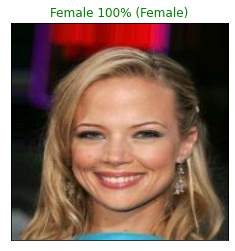

In [71]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [72]:
model.evaluate(val_data)


63/63 [==============================] - 3s 48ms/step - loss: 0.1937 - accuracy: 0.9300


[0.19372667372226715, 0.9300000071525574]

In [73]:
len(X)

160000

## **Note:** 
I tried training my model with the entire training dataset (i.e 160k images) and the kaggle kernel CPU is filled up so I would recommend training with less than 100k images

In [74]:
X=All_training_files[:90000]
y=boolean_labels[:90000]

In [75]:
X_val,y_val=All_val_files,boolean_val_labels

In [76]:
# Creating full training and validation data batches
Full_training_data=create_data_batches(X,y)
Full_validation_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches....
Create validation data batches.....


In [77]:
len(Full_training_data)

2813

In [78]:
full_model=create_model()

In [79]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [80]:
NUM_EPOCHS

100

In [81]:
full_model.fit(x=Full_training_data,
            epochs=NUM_EPOCHS,
            validation_data=Full_validation_data,
            validation_freq=1,
            callbacks=[early_stopping])
    

Epoch 1/100
2813/2813 [==============================] - 296s 105ms/step - loss: 0.1784 - accuracy: 0.9296 - val_loss: 0.1874 - val_accuracy: 0.9308
Epoch 2/100
2813/2813 [==============================] - 177s 63ms/step - loss: 0.1662 - accuracy: 0.9354 - val_loss: 0.1846 - val_accuracy: 0.9320
Epoch 3/100
2813/2813 [==============================] - 177s 63ms/step - loss: 0.1636 - accuracy: 0.9364 - val_loss: 0.1828 - val_accuracy: 0.9328
Epoch 4/100
2813/2813 [==============================] - 175s 62ms/step - loss: 0.1621 - accuracy: 0.9370 - val_loss: 0.1814 - val_accuracy: 0.9335
Epoch 5/100
2813/2813 [==============================] - 175s 62ms/step - loss: 0.1610 - accuracy: 0.9376 - val_loss: 0.1803 - val_accuracy: 0.9343
Epoch 6/100
2813/2813 [==============================] - 174s 62ms/step - loss: 0.1603 - accuracy: 0.9382 - val_loss: 0.1794 - val_accuracy: 0.9349
Epoch 7/100
2813/2813 [==============================] - 176s 62ms/step - loss: 0.1597 - accuracy: 0.9385 - val

In [82]:
# Storing all the test file paths 
female_test_files=[]
female_test=list()
male_test=list()
female_test_files=os.listdir(Test_female_path)
male_test_files=os.listdir(Test_male_path)
for i in range(len(os.listdir(Test_female_path))):
    female_test.append(Test_female_path+"/"+str(female_test_files[i]))
for i in range(len(os.listdir(Test_male_path))):
    male_test.append(Test_male_path+"/"+str(male_test_files[i]))
  

In [83]:
#Creating a test Dataframe
Test_df=pd.DataFrame()
Test_df=pd.DataFrame({"ID":female_test,"Target":"Female"})
new_test_row=pd.DataFrame({"ID":male_test,"Target":"Male"})
Test_df=Test_df.append(new_test_row,ignore_index=False)
#Shuffling the data frame
Test_df=Test_df.sample(frac=1)

In [84]:
Test_df.head()

,ID,Target
7052,../input/gender-recognition-200k-images-celeba...,Male
1543,../input/gender-recognition-200k-images-celeba...,Female
2530,../input/gender-recognition-200k-images-celeba...,Male
11495,../input/gender-recognition-200k-images-celeba...,Female
4984,../input/gender-recognition-200k-images-celeba...,Male


In [85]:
len(Test_df)

20001

In [86]:
X_test,y_test=Test_df["ID"][:10000],Test_df["Target"][:10000]

In [87]:
len(X_test)

10000

In [88]:
test_data=create_data_batches(X_test,y_test)

Creating training data batches....


## Step 3: Making Predictions on the entire test data set

In [89]:
# Making Predictions on the entire data set
test_predictions=full_model.predict(test_data,verbose=1)

313/313 [==============================] - 27s 85ms/step


In [90]:
test_predictions.shape

(10000, 2)

In [91]:
test_images,test_labels=unbatchify(test_data)

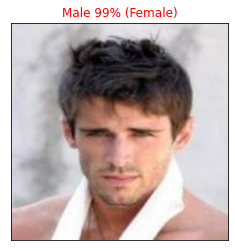

In [92]:
plot_pred(prediction_probabilities=test_predictions,
          labels=test_labels,
          images=test_images,n=200)

In [93]:
def show_test_25_images(images,label,predictions):
    # setup a figure 
    plt.figure(figsize=(10,10))
    # loop through 25 images
    for i in range(25):
        # Create subplots (5 rows,5 columns)
        ax=plt.subplot(5,5,i+1)
        # Display an image
        plot_test_pred(prediction_probabilities=predictions, labels=label, images=images, n=i)
        
        # Turn the grid lines off
        plt.axis("off")

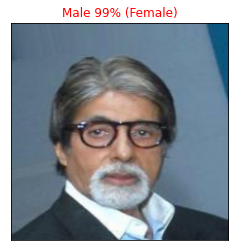

In [94]:
plot_pred(prediction_probabilities=test_predictions, labels=test_labels, images=test_images, n=0)

In [95]:
def plot_test_pred(prediction_probabilities, labels, images, n=0):
    
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
    # Get the pred label
    pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
    
    color = "green"

    plt.title("{} {:2.0f}%".format(pred_label,
                                      np.max(pred_prob)*100),
                                      color=color)

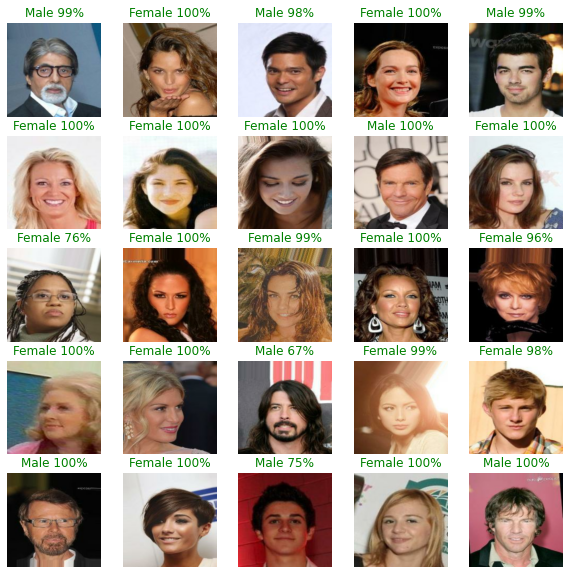

In [96]:
show_test_25_images(images=test_images,label=test_labels,predictions=test_predictions)